In [30]:
# import libraries and Twitter keys & tokens
import tweepy
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re
import spacy
nlp = spacy.load('en_core_web_lg')

%store -r API_Key
%store -r API_Secret
%store -r Bearer_Token 
%store -r Access_Token
%store -r Access_Token_Secret

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jasminechung/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jasminechung/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [70]:
# scrape the most recent 100 tweets from Bitcoin Archive 
client = tweepy.Client(bearer_token=Bearer_Token)
response = client.search_recent_tweets(query='from:BTC_Archive lang:en -is:retweet',max_results=100)

# store the tweet texts into a dataframe
tweet_text = []

for tweet in response.data:
    tweet_text.append(tweet.text)
    
data = {'tweet_text':tweet_text}
df = pd.DataFrame(data)

df

,tweet_text
0,@MEBGE1 😂 fr tho…
1,@CoinHeated @AltcoinGordon It’s a real tweet.
2,@LawrenceLepard he's been banned??? For WHAT?!
3,@UrCryptoDad @AltcoinGordon you bet we do! 😂 h...
4,@AltcoinGordon 😂 there are only 22 countries b...
...,...
95,@Unshakable_J @intocryptoverse Nah that’s on y...
96,@crypto_madz @AltcoinGordon All good things co...
97,@Do82Nic @crypto_madz Possible.
98,@crypto_madz It’s her. Definitely her. \n\nYou...


In [71]:
# split all tweets into individual words
all_words = list()

for index, row in df.iterrows():
    split_tweet = row['tweet_text'].split()
    for s in split_tweet:
        all_words.append(s)

all_words

['@MEBGE1',
 '😂',
 'fr',
 'tho…',
 '@CoinHeated',
 '@AltcoinGordon',
 'It’s',
 'a',
 'real',
 'tweet.',
 '@LawrenceLepard',
 "he's",
 'been',
 'banned???',
 'For',
 'WHAT?!',
 '@UrCryptoDad',
 '@AltcoinGordon',
 'you',
 'bet',
 'we',
 'do!',
 '😂',
 'https://t.co/Y0mS1zZ4bw',
 '@AltcoinGordon',
 '😂',
 'there',
 'are',
 'only',
 '22',
 'countries',
 'bro.',
 'Not',
 'that',
 'hard.',
 '@AltcoinGordon',
 'You',
 'didn’t',
 'see',
 'that',
 'coming',
 'huh?',
 '😉',
 '😂',
 '@AltcoinGordon',
 'Xi,',
 'i',
 'think',
 'you’re',
 'right!',
 '@AltcoinGordon',
 'Biden',
 'your',
 'time',
 'for',
 'the',
 'right',
 'price…',
 '@crypto_madz',
 '@AltcoinGordon',
 'Y’a',
 'but',
 'you',
 'iz',
 'not',
 'fat',
 ':))',
 '@AltcoinGordon',
 'Bitcoin',
 'needs',
 'a',
 'Putin',
 'Price',
 'Hike',
 '😂',
 '@AltcoinGordon',
 '3',
 'months',
 'bro…',
 'I’m',
 'getting',
 'fat',
 'already.',
 'Ready',
 'for',
 'it',
 '😂',
 '@AltcoinGordon',
 'All',
 'your',
 'coins',
 'be',
 'like👇👇👇',
 '0.00000000000000000000

In [72]:
# remove punctuations

all_words = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in all_words]

all_words2 = []

for word in all_words:
    if word != '':
        all_words2.append(word)

In [73]:
# stem the words to their root
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in all_words2:
    stem.append(s_stemmer.stem(word))
    
stem

['mebge1',
 'fr',
 'tho',
 'coinheat',
 'altcoingordon',
 'it',
 'a',
 'real',
 'tweet',
 'lawrencelepard',
 'hes',
 'been',
 'ban',
 'for',
 'what',
 'urcryptodad',
 'altcoingordon',
 'you',
 'bet',
 'we',
 'do',
 'httpstcoy0ms1zz4bw',
 'altcoingordon',
 'there',
 'are',
 'onli',
 '22',
 'countri',
 'bro',
 'not',
 'that',
 'hard',
 'altcoingordon',
 'you',
 'didnt',
 'see',
 'that',
 'come',
 'huh',
 'altcoingordon',
 'xi',
 'i',
 'think',
 'your',
 'right',
 'altcoingordon',
 'biden',
 'your',
 'time',
 'for',
 'the',
 'right',
 'price',
 'cryptomadz',
 'altcoingordon',
 'ya',
 'but',
 'you',
 'iz',
 'not',
 'fat',
 'altcoingordon',
 'bitcoin',
 'need',
 'a',
 'putin',
 'price',
 'hike',
 'altcoingordon',
 '3',
 'month',
 'bro',
 'im',
 'get',
 'fat',
 'alreadi',
 'readi',
 'for',
 'it',
 'altcoingordon',
 'all',
 'your',
 'coin',
 'be',
 'like',
 '00000000000000000000001',
 'matthewpin',
 'niccart',
 'williamjluth',
 'lynaldencontact',
 'a',
 'lot',
 'of',
 'major',
 'fin',
 'insti

In [74]:
# remove all stop words

stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)
        
stem2

['mebge1',
 'fr',
 'tho',
 'coinheat',
 'altcoingordon',
 'real',
 'tweet',
 'lawrencelepard',
 'hes',
 'ban',
 'urcryptodad',
 'altcoingordon',
 'bet',
 'httpstcoy0ms1zz4bw',
 'altcoingordon',
 'onli',
 '22',
 'countri',
 'bro',
 'hard',
 'altcoingordon',
 'didnt',
 'come',
 'huh',
 'altcoingordon',
 'xi',
 'think',
 'right',
 'altcoingordon',
 'biden',
 'time',
 'right',
 'price',
 'cryptomadz',
 'altcoingordon',
 'ya',
 'iz',
 'fat',
 'altcoingordon',
 'bitcoin',
 'need',
 'putin',
 'price',
 'hike',
 'altcoingordon',
 '3',
 'month',
 'bro',
 'im',
 'fat',
 'alreadi',
 'readi',
 'altcoingordon',
 'coin',
 'like',
 '00000000000000000000001',
 'matthewpin',
 'niccart',
 'williamjluth',
 'lynaldencontact',
 'lot',
 'major',
 'fin',
 'institut',
 'bitcoinreadi',
 'veri',
 'close',
 'know',
 'northmantrad',
 'farkoff',
 'altcoingordon',
 'steve',
 'steve',
 'steve',
 'altcoingordon',
 'relationship',
 'advic',
 'someth',
 'dont',
 'bro',
 'think',
 'dr',
 'phil',
 'httpstcoqeunhtdslc',
 

In [77]:
df = pd.DataFrame(stem2)
df = df[0].value_counts()

In [78]:
# count frequencis of the words in tweets
from nltk.probability import FreqDist

freqcounter = FreqDist()

for word in df:
    freqcounter[word] += 1

freqcounter

FreqDist({1: 346, 2: 60, 3: 20, 4: 7, 6: 3, 5: 3, 28: 1, 24: 1, 10: 1})

In [58]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


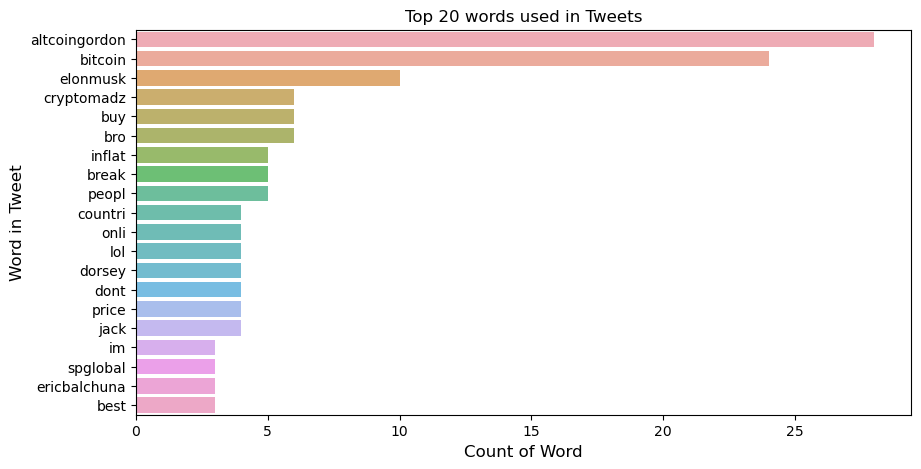

In [79]:
df = df[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top 20 words used in Tweets')
plt.ylabel('Word in Tweet', fontsize =12)
plt.xlabel('Count of Word', fontsize =12)
plt.show()

In [80]:
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [81]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - '+ ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [84]:
# count the most mentioned people in tweets
str1 = " "
stem2 = str1.join(all_words2)

stem2 = nlp(stem2)
label = [(X.text, X.label_) for X in stem2.ents]
df6 = pd.DataFrame(label, columns = ['Word','Entity'])
df7 = df6.where(df6['Entity'] == 'PERSON')
df7 = df7['Word'].value_counts()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


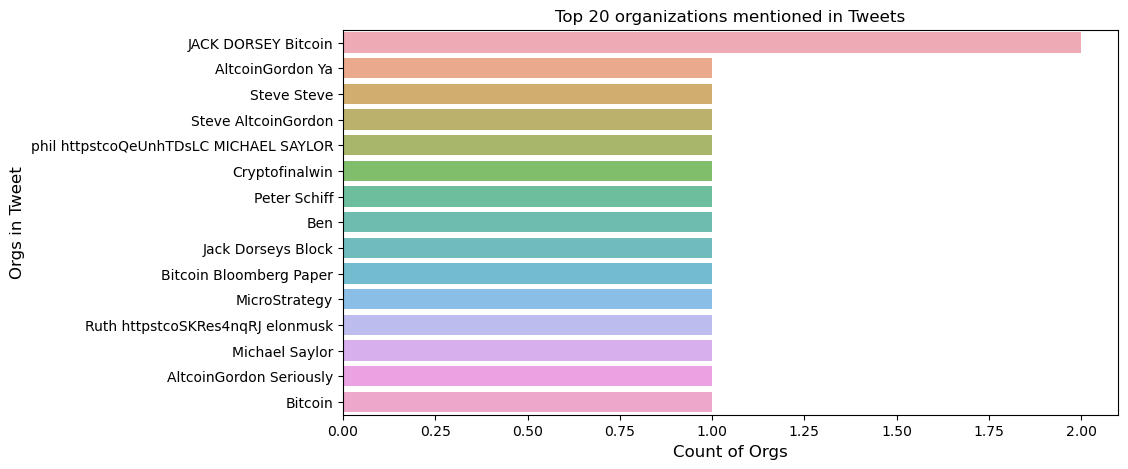

In [85]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top 20 organizations mentioned in Tweets')
plt.ylabel('Orgs in Tweet', fontsize =12)
plt.xlabel('Count of Orgs', fontsize =12)
plt.show()